Automatically created module for IPython interactive environment


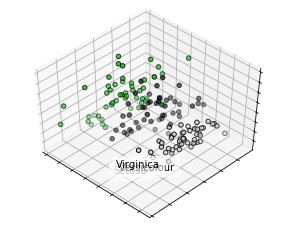

In [2]:
print(__doc__)

#PCA：主成分分析
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np#numpyをインストール
import matplotlib.pyplot as plt#グラフを書くやつ
from mpl_toolkits.mplot3d import Axes3D#3次元plotを行うためのツール


from sklearn import decomposition#PCAのライブラリ
from sklearn import datasets#datasetsを取ってくる

np.random.seed(5)#同じ乱数を生成

#centers = [[1, 1], [-1, -1], [1, -1]]#3次元配列を作ってる
#print(centers)
iris = datasets.load_iris()
#print(iris)
X = iris.data
#print(X)
y = iris.target
#print(y.shape)
fig = plt.figure(2, figsize=(4, 3))
#plt.clf()#プロットのキャッシュをクリア
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#plt.cla()
pca = decomposition.PCA(n_components=3)#3次元空間でPCAを適用
pca.fit(X)#IrisのデータをPCAに渡す
X = pca.transform(X)#データの次元を削減する

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))##ラベルを付けている

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [2, 0, 1]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()